In [393]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

In [394]:
def RBF(x1,x2,*,length_scale=1.0):
    return np.exp(-0.5/length_scale**2 * (x1-x2)**2)

def covMatrix(reference_points,data_points,*,length_scale=1.0):
    xs,ys = np.meshgrid(data_points,reference_points,sparse=True)
    mat = RBF(xs,ys,length_scale=length_scale)
    
    return mat
def sigmaMatrix(sigma_sq,*,size=0):
    if np.isscalar(sigma_sq):
        return np.eye(size) / sigma_sq
    
    return np.diag(1 / sigma_sq)

In [395]:
def func(x,noise=0.0):
    return np.sin(x) + noise*np.random.randn(*x.shape)

In [396]:
bounds = np.array([0.0, np.pi])

noise = 0.1

length_scales = [0.3, 0.5, 1.0, 2.0]

num_reference_points = 10
referencegrid = np.linspace(*bounds,num_reference_points)

num_datapoints = 15
datagrid = np.random.uniform(*bounds,num_datapoints)
data_values = func(datagrid,noise)

num_gridpoints = 101
grid = np.linspace(*bounds,num_gridpoints)

C:\Users\lukas\AppData\Local\Temp\ipykernel_14924\3389774057.py:11: LinAlgWarning: Ill-conditioned matrix (rcond=9.30713e-18): result may not be accurate.
  c_nonreg = solve(non_reg,K_MN@S@data_values)
C:\Users\lukas\AppData\Local\Temp\ipykernel_14924\3389774057.py:10: LinAlgWarning: Ill-conditioned matrix (rcond=1.28887e-17): result may not be accurate.
  c_reg = solve(reg,K_MN@S@data_values)
C:\Users\lukas\AppData\Local\Temp\ipykernel_14924\3389774057.py:11: LinAlgWarning: Ill-conditioned matrix (rcond=1.72712e-18): result may not be accurate.
  c_nonreg = solve(non_reg,K_MN@S@data_values)


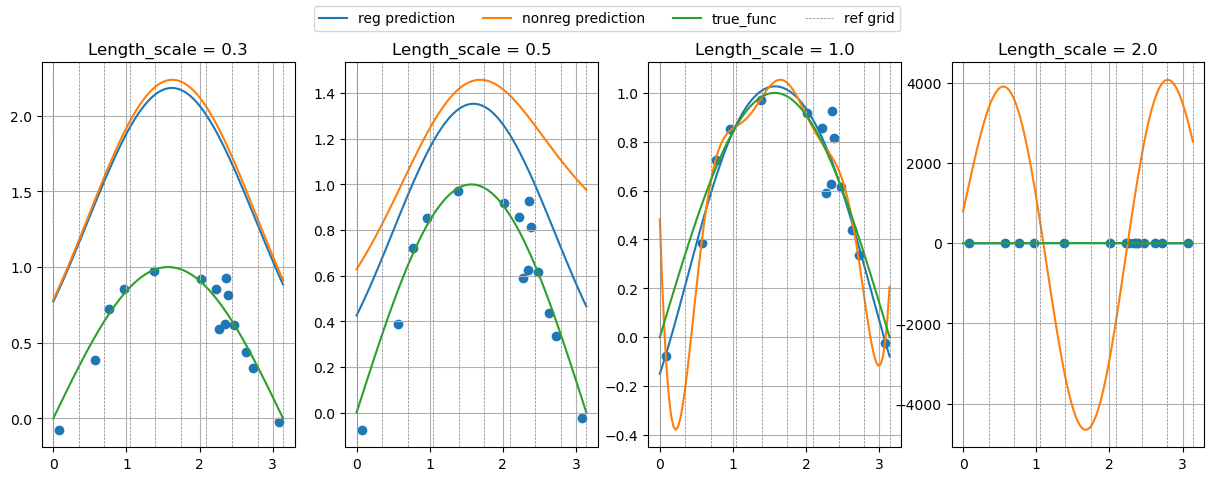

In [397]:
f, ax = plt.subplots(1,len(length_scales), figsize=(15, 5))

for i,length_scale in enumerate(length_scales):
    K_MN = covMatrix(reference_points=referencegrid,data_points=datagrid,length_scale=length_scale)
    K_MM = covMatrix(reference_points=referencegrid,data_points=referencegrid,length_scale=length_scale)
    S = np.eye(num_datapoints) / noise**2

    reg = K_MM + K_MN@S@K_MN.T
    non_reg = K_MN@S@K_MN.T
    c_reg = solve(reg,K_MN@S@data_values)
    c_nonreg = solve(non_reg,K_MN@S@data_values)

    pred_reg = [c_reg@RBF(x,referencegrid) for x in grid] 
    pred_nonreg = [c_nonreg@RBF(x,referencegrid) for x in grid]

    ax[i].plot(grid,pred_reg,label="reg prediction")
    ax[i].plot(grid,pred_nonreg,label="nonreg prediction")
    ax[i].plot(grid,func(grid),label="true_func")
    ax[i].vlines(referencegrid,0,1,ls="--",colors="grey",lw=0.5,transform=ax[i].get_xaxis_transform(),label="ref grid")
    ax[i].scatter(datagrid,data_values)
    ax[i].grid()
    ax[i].set_title(f"Length_scale = {length_scale}")

handles, labels = ax[0].get_legend_handles_labels()
f.legend(handles, labels, loc='upper center',ncol=4)